In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas.io.data import DataReader

/Users/yusukemuramatsu/anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
from datetime import datetime
from __future__ import division

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [11]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,109.351071,110.423770,108.177619,109.314722,4.761977e+07,108.041407
std,10.362411,10.291371,10.367547,10.308772,2.112623e+07,9.664299
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,99.192499,100.720003,98.475002,99.807501,3.323538e+07,99.420312
50%,110.210003,111.529999,108.855000,110.070000,4.339970e+07,108.649884
75%,116.535000,117.660002,115.455002,116.279999,5.538038e+07,114.705490
max,132.850006,132.970001,130.699997,132.070007,1.622063e+08,129.419998


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-06-15 to 2016-06-13
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


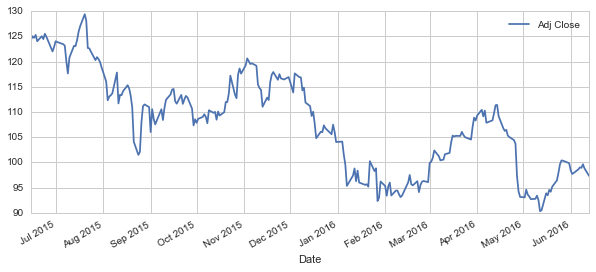

In [15]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

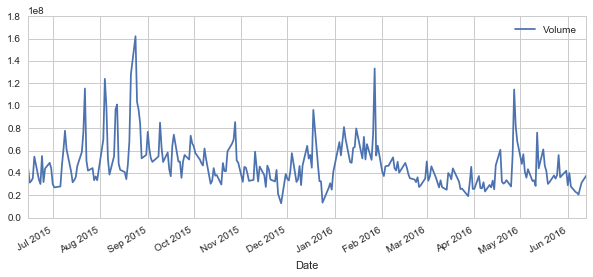

In [16]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [18]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name]= pd.rolling_mean(AAPL['Adj Close'],ma)

/Users/yusukemuramatsu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/Users/yusukemuramatsu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/yusukemuramatsu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


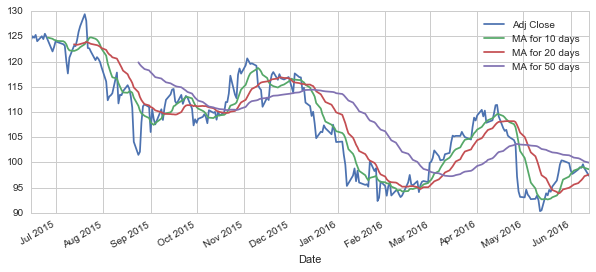

In [19]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

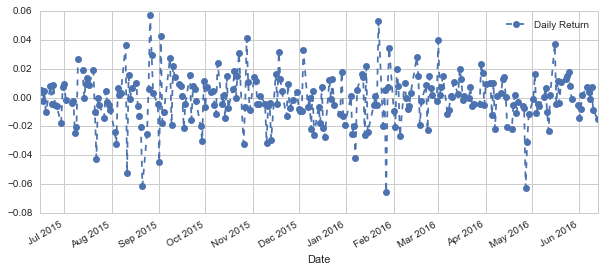

In [20]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')


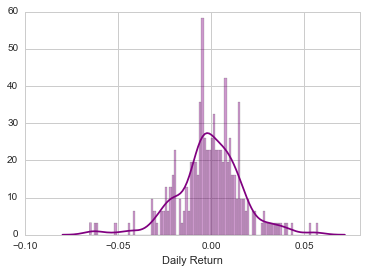

In [21]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

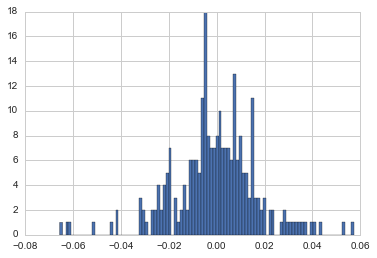

In [23]:
AAPL['Daily Return'].hist(bins=100)

In [24]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [27]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-06-15,124.373324,423.670013,527.200012,44.250117
2015-06-16,125.039680,427.260010,528.150024,44.590655
2015-06-17,124.745705,427.809998,529.260010,44.726868
2015-06-18,125.314061,439.390015,536.729980,45.456586
2015-06-19,124.059746,434.920013,536.690002,44.853350


In [28]:
tech_rets = closing_df.pct_change()

In [29]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-06-15,NaN,NaN,NaN,NaN
2015-06-16,0.005358,0.008474,0.001802,0.007696
2015-06-17,-0.002351,0.001287,0.002102,0.003055
2015-06-18,0.004556,0.027068,0.014114,0.016315
2015-06-19,-0.010009,-0.010173,-0.000074,-0.013271


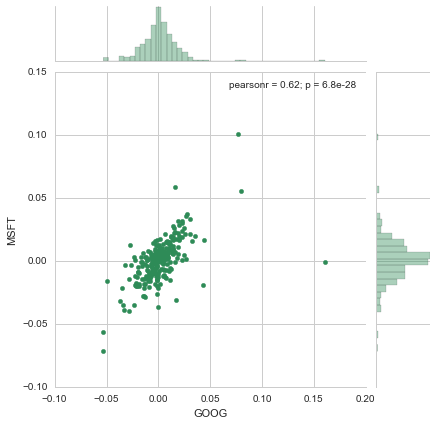

In [35]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter', color='seagreen')

In [36]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-06-15,NaN,NaN,NaN,NaN
2015-06-16,0.005358,0.008474,0.001802,0.007696
2015-06-17,-0.002351,0.001287,0.002102,0.003055
2015-06-18,0.004556,0.027068,0.014114,0.016315
2015-06-19,-0.010009,-0.010173,-0.000074,-0.013271


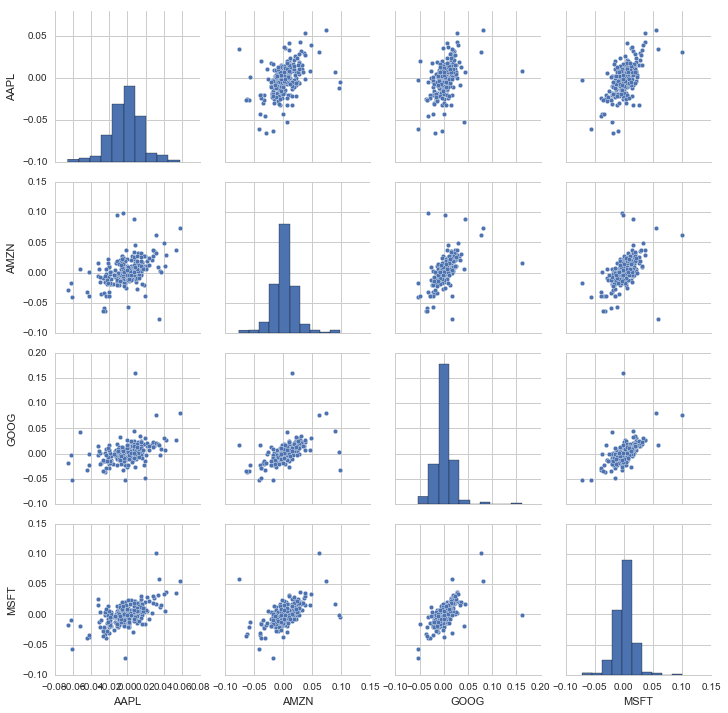

In [37]:
sns.pairplot(tech_rets.dropna())

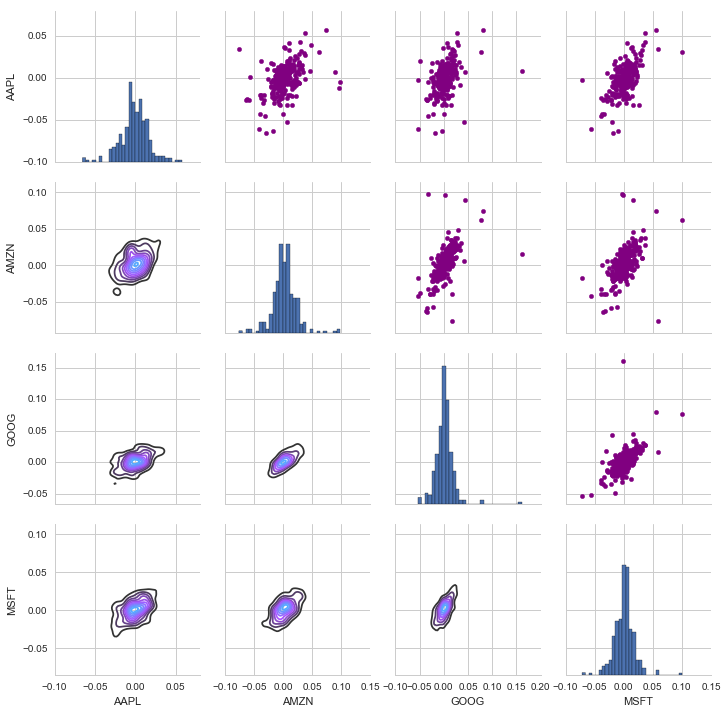

In [39]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap= 'cool_d')

returns_fig.map_diag(plt.hist,bins=30)

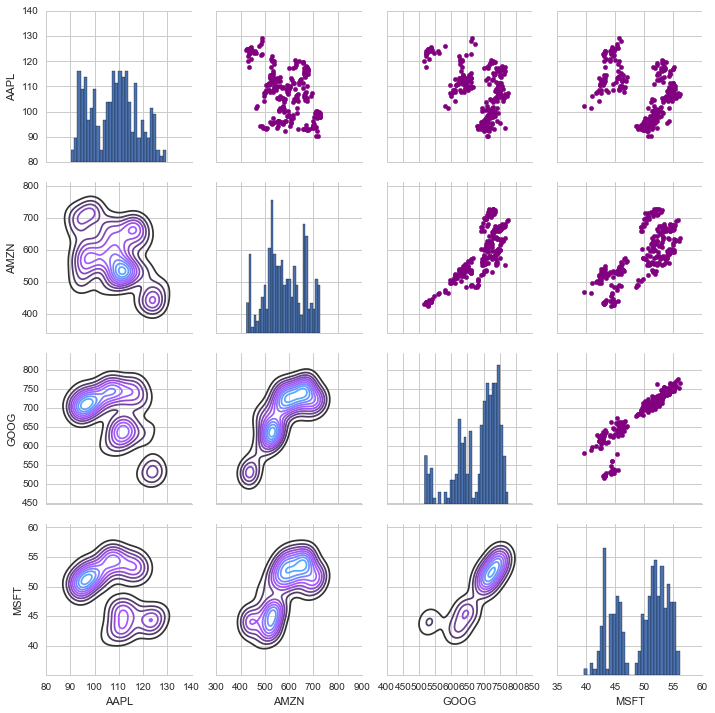

In [40]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap= 'cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [44]:
sns.corrplot(tech_rets.dropna(),annot=True)

AttributeError: 'module' object has no attribute 'corrplot'

In [45]:
rets = tech_rets.dropna()

In [46]:
area = np.pi*20

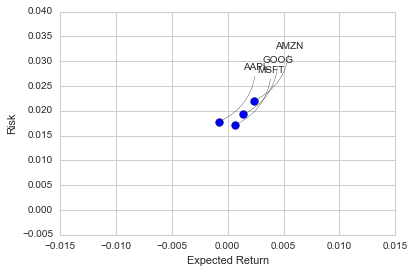

In [51]:
plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


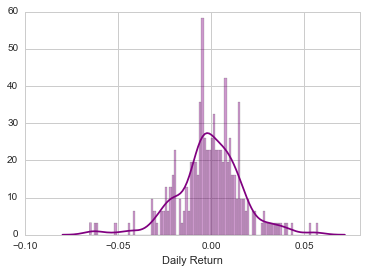

In [53]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [54]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-06-16,0.005358,0.008474,0.001802,0.007696
2015-06-17,-0.002351,0.001287,0.002102,0.003055
2015-06-18,0.004556,0.027068,0.014114,0.016315
2015-06-19,-0.010009,-0.010173,-0.000074,-0.013271
2015-06-22,0.007978,0.003150,0.002795,0.002820


In [58]:
rets['AAPL'].quantile(0.05)

-0.028138853472663872

In [59]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']


In [62]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt 
        
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price
    

In [63]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-06-15,528.000000,528.299988,524.000000,527.200012,1632700,527.200012
2015-06-16,528.400024,529.640015,525.559998,528.150024,1071800,528.150024
2015-06-17,529.369995,530.979980,525.099976,529.260010,1294200,529.260010
2015-06-18,531.000000,538.150024,530.789978,536.729980,1833100,536.729980
2015-06-19,537.210022,538.250000,533.010010,536.690002,1893500,536.690002


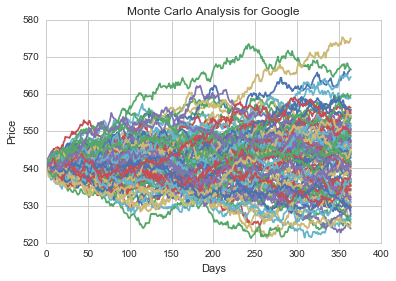

In [66]:
start_price = 540.74

for run in xrange (100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [69]:
runs = 10000

simulations = np.zeros(runs)
for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

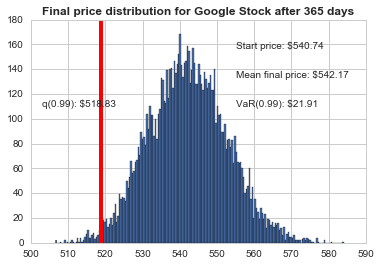

In [70]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');